### 3.2.3 レジームスイッチモデル

ー**フェデラルファンド金利の基準値スイッチングモデル**ー

フェデラルファンド金利を一定の基準値の周りでノイズをもつとしてモデル化し、異なるレジームで基準値を変化させます。このモデルは非常にシンプルで、以下の形式を取ります：

$$ r_t=\mu s_t + \varepsilon_t \;\;\; \varepsilon_t \sim N(0,\sigma^2)$$
ここで、$r_t$は時刻$t$におけるフェデラルファンド金利、$\mu$は各レジームの切片、$s_t$はレジームを示す指標（0または1）、$\varepsilon_t$は正規分布に従うノイズです。レジームは以下の遷移確率に従って変わります：

$$P(S_t=s_t|S_{t-1}=s_{t-1})=\begin{bmatrix}p_{00} & p_{10}\\ 1-p_{00} & 1-p_{10}\end{bmatrix}$$

ここで、$p_{00}$と$p_{10}$はレジーム遷移の確率です。このモデルのパラメータは最尤法によって推定されます：$p_{00}, p_{10}, \mu_0, \mu_1, \beta_0, \beta_1, \sigma^2$。最尤法は観測データに基づいて尤度関数を定義し、その尤度関数を最大化するパラメータの値を求めます。

ーダミー変数との違いー

このモデルは、ダミー変数を使用した通常の線形回帰モデルとは異なります。ダミー変数を用いたモデルでは、状態の変化（例えば政策の変更）を示すために変数が使用されますが、マルコフ連鎖を用いたモデルでは、状態の変化が確率的に決定され、それが連続的に観測データに影響を及ぼします。このアプローチは、レジームが時間を通じて変化するという現実をより正確に反映することができます。

ーマルコフ連鎖と尤度関数ー

レジーム遷移がマルコフ連鎖に従う場合、レジーム遷移の確率が尤度関数に影響を与え、パラメータ推定に影響を及ぼします。尤度関数は、全ての観測データに対する確率密度関数の積として定義され、通常、尤度関数の対数を取って最大化します。

最尤推定値の計算は、数値的最適化手法（例えば勾配降下法やニュートン法など）を用いて行われます。尤度関数は多くの場合非線形で複雑なため、解析的に解を求めるのが難しいのです。


ー尤度関数ー

尤度関数は、観測データが正規分布に従うという前提のもとで定義されます。尤度関数は観測されたデータの確率密度関数の積として表され、対数尤度関数はこの積の対数です。対数尤度関数は以下のようになります：

$$ \log L(\mu, \sigma^2 | r_t, s_t) = \sum_{t=1}^{T} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\frac{(r_t - \mu s_t)^2}{2\sigma^2} \right) \right) $$

ここで、$\mu$と$\sigma^2$を偏微分し、0と等しいと置くことで、最尤推定値を見つけることができます。

マルコフ連鎖を使用する場合、レジーム遷移確率（$p_{00}$、$p_{10}$）も尤度関数に組み込まれます。レジーム遷移確率は、各時点でのレジームが前の時点のレジームに基づいてどのように変化するかを表します。これにより、尤度関数はさらに複雑になり、推定がより困難になることがあります。

最適化は、通常、反復的な数値的手法を使用して行われます。これには、勾配降下法、ニュートン-ラフソン法、EMアルゴリズムなどが含まれます。これらの手法は、対数尤度関数の最大値に収束するまでパラメータを更新します。

ーstatsmodels **MarkovRegression**ー

Statsmodelsライブラリにおける`MarkovRegression`を使用します。これは、マルコフ連鎖に基づくレジームスイッチング回帰モデルを実装するために特化されています。

マルコフ連鎖は、ある状態がその直前の状態にのみ依存して遷移する確率的プロセスです。レジームスイッチモデルでは、この性質を利用して、経済や金融データの異なる時期や状態（レジーム）間の遷移をモデル化します。例えば、景気拡大期と景気後退期を異なるレジームとして捉え、その遷移をマルコフ連鎖で表現することができます。

`MarkovRegression`は、マルコフ連鎖に基づくレジームスイッチモデルを簡単に構築し、推定するための便利なツールです。このクラスを使用することで、以下の利点が得られます：

- **レジーム依存パラメータの推定:** 異なるレジームごとに異なる回帰係数や切片を推定できます。
- **レジーム遷移確率の推定:** どのレジームからどのレジームへの遷移がどれだけの確率で起こるかを推定します。
- **統計的推論:** モデルの適合性やパラメータの有意性に関する統計的推論が可能です。

ー状態空間方程式ー

`MarkovRegression`モデルは、状態空間モデルの形式をとります。状態空間モデルでは、観測される変数（観測方程式）と内部状態（状態方程式）の関係を定式化します。レジームスイッチモデルでは、内部状態が異なるレジームを表し、これらの状態がマルコフ連鎖に従って遷移します。このアプローチにより、観測データの背後にある潜在的なダイナミクスを捉えることができます。

総じて、`MarkovRegression`を使用することで、データの背後にあるレジーム依存の動的な挙動を捉え、より洞察に富んだ分析を行うことが可能になります。このモデルは、特に経済や金融データにおいて、異なる政策環境や景気サイクルなどを考慮した分析に適しています。レジームスイッチングモデルを使用することで、データの異なる期間にわたる挙動や、それに伴う経済的・金融的な変化をより深く理解することができます。

また、状態空間モデルの枠組みを採用することで、モデルの柔軟性が高まり、時系列データの様々な側面や非定常性を取り扱うことができます。これにより、時系列データの隠れた構造やパターンを明らかにし、より精度の高い予測や政策分析が可能になります。


与えられたモデル $r_t = \mu s_t + \varepsilon_t$ は、以下のように状態空間モデルとして書き換えることができます：

1. **観測方程式**:
   $$ r_t = \mu_t + \varepsilon_t, \;\;\; \varepsilon_t \sim N(0, \sigma^2) $$
   ここで、$r_t$ は時刻 $t$ での観測されるフェデラルファンド金利、$\mu_t$ は時刻 $t$ での状態変数（intercept）、$\varepsilon_t$ は観測ノイズを表します。

2. **状態方程式**:
   $$ \mu_t = s_t \mu $$
   ここで、$\mu_t$ は時刻 $t$ での状態変数、$s_t$ はレジームを示す変数（0か1）、$\mu$ は各レジームにおけるinterceptの値です。

レジームの遷移確率は、状態方程式に直接含まれませんが、`MarkovRegression` モデルの一部として扱われ、レジーム間の遷移をモデル化します。このように、状態空間モデルは観測データと内部状態の両方を用いて、時間とともに変化するダイナミックシステムを表現することができます。

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime

<AxesSubplot:title={'center':'Federal funds rate'}>

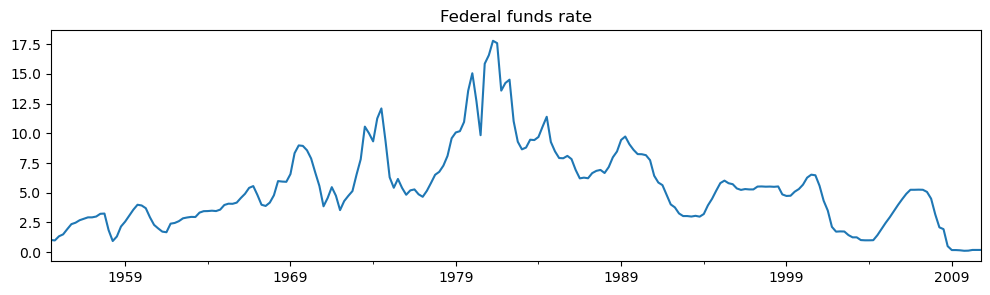

In [2]:
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds

dta_fedfunds = pd.Series(
    fedfunds, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS")
)

# Plot the data
dta_fedfunds.plot(title="Federal funds rate", figsize=(12, 3))

In [3]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(dta_fedfunds, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()
res_fedfunds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               MarkovRegression   Log Likelihood                -508.636
Date:                Wed, 17 Jan 2024   AIC                           1027.272
Time:                        03:11:55   BIC                           1044.375
Sample:                    07-01-1954   HQIC                          1034.174
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7088      0.177     20.988      0.000       3.362       4.055
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5568      0.300     31.857      0.000       8.969      10.145
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.4418      0.425     10.447      0.000       3.608       5.275
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9821      0.010     94.443      0.000       0.962       1.002
p[1->0]        0.0504      0.027      1.876      0.061      -0.002       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

要約レポートから、「低レジーム」におけるフェデラルファンド金利の平均は3.7％と推定されていますが、「高レジーム」では9.6％です。以下では、高レジームにあると推定される確率の滑らかな推移をプロットしています。このモデルは、1980年代が高いフェデラルファンド金利が存在した時期であることを示唆しています。

1. **`p[0->0] = 0.9821`**: この値は非常に高く、レジーム0から同じレジーム0に留まる確率が非常に高いことを示しています。標準誤差が0.010と小さいため、この推定値は統計的にかなり正確であると言えます。この値から、このモデルのレジーム0は非常に安定していると推測できます。

2. **`p[1->0] = 0.0504`**: これは、レジーム1からレジーム0への遷移確率が比較的低いことを示しています。ただし、P値が0.061であり、通常の統計的有意水準（0.05）よりもわずかに高いため、この遷移は統計的には有意とは言えない可能性があります。

3. **`p[0->1]`の計算**: 2状態モデルでは、あるレジームから他のレジームへの遷移確率は、1から同じレジームに留まる確率を引いて計算することができます。つまり、`p[0->1] = 1 - p[0->0]` です。したがって、`p[0->1] = 1 - 0.9821 = 0.0179` となります。これは、レジーム0からレジーム1への遷移確率が非常に低いことを示しており、レジーム0が非常に安定していることをさらに裏付けています。

これらの遷移確率の値から、モデルの状態遷移の特性を理解することができます。レジーム0は非常に安定しており、一度レジーム0に遷移すると、そこから他のレジームに移る可能性は低いとされます。一方で、レジーム1からレジーム0への遷移はあまり頻繁ではないことが示唆されていますが、この遷移の有意性は限定的です。

<AxesSubplot:title={'center':'Probability of being in the high regime'}>

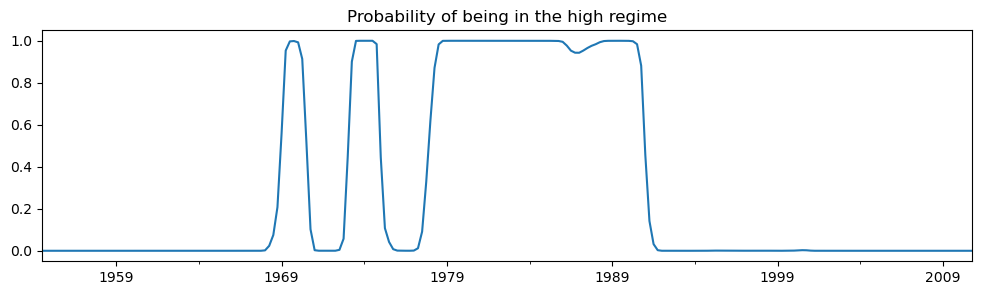

In [4]:
res_fedfunds.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

推定された遷移行列から、低レジームと高レジームの期待持続時間を計算します。

In [5]:
print(res_fedfunds.expected_durations)

[55.85400626 19.85506546]


ー自**己回帰型フェデラルファンド金利基準値スイッチングモデル**ー

この二つ目の例では、前のモデルにフェデラルファンド金利のラグを追加します。
$$r_t=\mu s_t + r_{t-1}\beta s_t+\varepsilon_t \;\;\; \varepsilon_t \sim N(0,\sigma^2)$$

ここで、$S_t \in \{0,1\}$であり、レジームは以下のように変化します。

$$P(S_t=s_t|S_{t-1}=s_{t-1})=\begin{bmatrix}p_{00} & p_{10}\\ 1-p_{00} & 1-p_{10}\end{bmatrix}$$

このモデルでは、$r_t$は、レジーム$s_t$（値が0または1）に依存する$\mu$（平均）と、前の時点での金利$r_{t-1}$に依存する自己回帰係数$\beta$によって影響を受けます。$\varepsilon_t$は正規分布に従う誤差項です。このモデルのパラメータは最尤法によって推定されます：$p_{p00},p_{10},\mu_0,\mu_1,\beta_0,\beta_1,\sigma^2$。

尤度関数は、全ての観測データに対する確率密度関数の積です。正規分布を仮定すると、確率密度関数は次のようになります：

$$ f(r_t | r_{t-1}, s_t, \mu, \beta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\frac{(r_t - \mu s_t - r_{t-1}\beta s_t)^2}{2\sigma^2} \right) $$

したがって、尤度関数$L$は以下のようになります：

$$ L(\mu, \beta, \sigma^2 | r_t, s_t) = \prod_{t=1}^{T} f(r_t | r_{t-1}, s_t, \mu, \beta, \sigma^2) $$

ここで、$T$は観測データの総数です。計算を簡単にするために、通常は尤度関数の対数を取ります（対数尤度関数）。対数尤度関数は次のようになります：

$$ \log L(\mu, \beta, \sigma^2 | r_t, s_t) = \sum_{t=1}^{T} \log f(r_t | r_{t-1}, s_t, \mu, \beta, \sigma^2) $$

最尤値を見つけるためには、この対数尤度関数を$\mu$、$\beta$、$\sigma^2$に関して偏微分し、それらを0に等しいと置いて解きます。これは一般的に数値的な手法（例：ニュートン-ラフソン法）を用いて行われます。尤度関数が最大となるパラメータ値が、最尤推定値となります。

In [6]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[1:], k_regimes=2, exog=dta_fedfunds.iloc[:-1]
)
res_fedfunds2 = mod_fedfunds2.fit()
res_fedfunds2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               MarkovRegression   Log Likelihood                -264.711
Date:                Wed, 17 Jan 2024   AIC                            543.421
Time:                        03:11:55   BIC                            567.334
Sample:                    10-01-1954   HQIC                           553.073
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7245      0.289      2.510      0.012       0.159       1.290
x1             0.7631      0.034     22.629      0.000       0.697       0.829
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0989      0.118     -0.835      0.404      -0.331       0.133
x1             1.0612      0.019     57.351      0.000       1.025       1.097
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4783      0.050      9.642      0.000       0.381       0.576
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.6378      0.120      5.304      0.000       0.402       0.874
p[1->0]        0.1306      0.050      2.634      0.008       0.033       0.228
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

サマリーレポートから

1. 情報基準は大幅に低下しており、これはこのモデルが前のモデルよりも適合度が高い

2. レジームの解釈は、切片の観点から変わり、最初のレジームがより高い切片を持ち、二番目のレジームが低い切片を持つ

などの特徴が分かります。さらに

1. **`p[0->0] = 0.6378`**: この値は、レジーム0から次の時点でもレジーム0に留まる確率が約63.78%であることを示しています。この確率は中程度であり、レジーム0がある程度安定しているが、時間とともに変化する可能性もあることを示唆しています。標準誤差は0.120で、z値が5.304と統計的に有意です（P値<0.05）。

2. **`p[1->0] = 0.1306`**: これは、レジーム1からレジーム0への遷移確率が約13.06%であることを意味します。この値は比較的低いですが、z値は2.634であり、P値が0.008と統計的に有意な遷移であることを示しています。これは、レジーム1からレジーム0への遷移があまり頻繁ではないことを意味します。

3. **`p[0->1]`の計算**: これは、レジーム0からレジーム1への遷移確率を計算することによって求められます。マルコフ過程では、あるレジームから別のレジームへの遷移確率は、1から同じレジームに留まる確率を引いて求められます。したがって、`p[0->1] = 1 - p[0->0] = 1 - 0.6378 = 0.3622`となります。これは、レジーム0からレジーム1への遷移が比較的高い確率（約36.22%）で発生することを示しています。

これらの結果から、モデルではレジーム間の遷移がそれなりに頻繁に起こることが示唆されています。レジーム0は安定していますが、一定の割合でレジーム1へと移行する可能性があり、レジーム1からレジーム0への遷移は比較的まれですが、それでも統計的に有意です。

<AxesSubplot:title={'center':'Probability of being in the high regime'}>

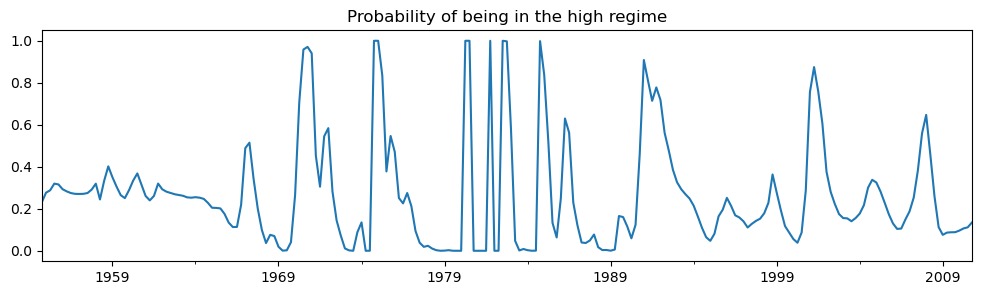

In [7]:
res_fedfunds2.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)


In [8]:
print(res_fedfunds2.expected_durations)

[2.76105188 7.65529154]


ー**テイラールールを用いたレジームモデル**ー

アウトプットギャップとインフレーションという2つの追加の外生変数を含め、2つおよび3つのレジームを持つスイッチングモデルを推定し、どちらがよりデータに適合するかを確認します。

モデルの推定がしばしば困難であるため、3レジームモデルにおいては、結果を改善するために初期パラメータの探索を20回のランダムな反復を指定して行っています。

In [9]:
# Get the additional data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import ogap, inf

dta_ogap = pd.Series(ogap, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS"))
dta_inf = pd.Series(inf, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS"))

exog = pd.concat((dta_fedfunds.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]
exog

,0,1,2
1955-07-01,1.50,4.157602,-0.234724
1955-10-01,1.94,4.287756,0.373734
1956-01-01,2.36,3.016838,0.250065
1956-04-01,2.48,2.641856,1.046455
1956-07-01,2.69,1.824735,2.016656
...,...,...,...
2009-10-01,0.16,-6.894039,1.487498
2010-01-01,0.12,-6.830622,2.336871
2010-04-01,0.13,-6.265080,1.785890
2010-07-01,0.19,-5.932871,1.228732


In [10]:
# Fit the 2-regime model
mod_fedfunds3 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=2, exog=exog)
res_fedfunds3 = mod_fedfunds3.fit()

In [11]:
# Fit the 3-regime model
np.random.seed(12345)
mod_fedfunds4 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=3, exog=exog)
res_fedfunds4 = mod_fedfunds4.fit(search_reps=20)

In [12]:
res_fedfunds3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -229.256
Date:                Wed, 17 Jan 2024   AIC                            480.512
Time:                        03:11:58   BIC                            517.942
Sample:                    07-01-1955   HQIC                           495.624
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6555      0.137      4.771      0.000       0.386       0.925
x1             0.8314      0.033     24.951      0.000       0.766       0.897
x2             0.1355      0.029      4.609      0.000       0.078       0.193
x3            -0.0274      0.041     -0.671      0.502      -0.107       0.053
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0945      0.128     -0.739      0.460      -0.345       0.156
x1             0.9293      0.027     34.309      0.000       0.876       0.982
x2             0.0343      0.024      1.429      0.153      -0.013       0.081
x3             0.2125      0.030      7.147      0.000       0.154       0.271
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3323      0.035      9.526      0.000       0.264       0.401
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7279      0.093      7.828      0.000       0.546       0.910
p[1->0]        0.2115      0.064      3.298      0.001       0.086       0.337
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

1. **`p[0->0] = 0.7279`**: この値は、レジーム0から次の時点でもレジーム0に留まる確率が約72.79%であることを示しています。この比較的高い確率は、レジーム0がかなり安定していることを示唆しています。標準誤差は0.093であり、z値が7.828と非常に高く、統計的に有意です（P値<0.05）。これは、この遷移確率の推定が信頼できることを示しています。

2. **`p[1->0] = 0.2115`**: これは、レジーム1からレジーム0への遷移確率が約21.15%であることを意味します。この値は中程度であり、レジーム1からレジーム0への遷移が比較的一般的であることを示しています。標準誤差は0.064で、z値は3.298であり、P値が0.001と統計的に有意です。これは、レジーム1からレジーム0への遷移が、モデルにおいて重要な役割を果たしていることを示唆しています。

3. **`p[0->1]`の計算**: この遷移確率は、`p[0->1] = 1 - p[0->0]` として計算できます。したがって、`p[0->1] = 1 - 0.7279 = 0.2721` となります。これは、レジーム0からレジーム1への遷移確率が約27.21%であることを示しています。この確率は比較的高く、レジーム0からレジーム1への遷移も一定の頻度で発生していることを示しています。

これらの遷移確率の値から、モデルが示すレジーム間の動態には、ある程度の流動性があることがわかります。レジーム0は比較的安定していますが、時間とともにレジーム1へ移行する可能性があります。また、レジーム1からレジーム0への遷移もかなり頻繁に起こることが示されています。

In [13]:
res_fedfunds4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -180.806
Date:                Wed, 17 Jan 2024   AIC                            399.611
Time:                        03:11:58   BIC                            464.262
Sample:                    07-01-1955   HQIC                           425.713
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0250      0.290     -3.531      0.000      -1.594      -0.456
x1             0.3277      0.086      3.812      0.000       0.159       0.496
x2             0.2036      0.049      4.152      0.000       0.107       0.300
x3             1.1381      0.081     13.977      0.000       0.978       1.298
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0259      0.087     -0.298      0.765      -0.196       0.144
x1             0.9737      0.019     50.265      0.000       0.936       1.012
x2             0.0341      0.017      2.030      0.042       0.001       0.067
x3             0.1215      0.022      5.606      0.000       0.079       0.164
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7346      0.130      5.632      0.000       0.479       0.990
x1             0.8436      0.024     35.198      0.000       0.797       0.891
x2             0.1633      0.025      6.515      0.000       0.114       0.212
x3            -0.0499      0.027     -1.835      0.067      -0.103       0.003
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1660      0.018      9.240      0.000       0.131       0.201
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7214      0.117      6.177      0.000       0.493       0.950
p[1->0]     4.001e-08        nan        nan        nan         nan         nan
p[2->0]        0.0783      0.038      2.079      0.038       0.004       0.152
p[0->1]        0.1044      0.095      1.103      0.270      -0.081       0.290
p[1->1]        0.8259      0.054     15.208      0.000       0.719       0.932
p[2->1]        0.2288      0.073      3.150      0.002       0.086       0.371
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differ

1. **`p[0->0] = 0.7214`**: これはレジーム0から同じレジーム0に留まる確率が約72.14%であることを示しています。標準誤差は0.117で、z値が6.177、P値が0.000と非常に統計的に有意です。これはレジーム0が比較的安定していることを示しています。

2. **`p[1->0] = 4.001e-08`**: この値は非常に小さく、レジーム1からレジーム0への遷移がほとんど発生しないことを示しています。標準誤差やz値が計算されていないことから、この遷移確率は実質的に0と見なされている可能性が高いです。

3. **`p[2->0] = 0.0783`**: レジーム2からレジーム0への遷移確率は約7.83%です。これは比較的低い確率で、P値が0.038と統計的に有意な値です。

4. **`p[0->1] = 0.1044`**: レジーム0からレジーム1への遷移確率が約10.44%で、P値が0.270と統計的には有意でないことを示しています。

5. **`p[1->1] = 0.8259`**: これはレジーム1が自身に留まる確率が約82.59%で、非常に高い安定性を示しています。P値が0.000と非常に統計的に有意です。

6. **`p[2->1] = 0.2288`**: レジーム2からレジーム1への遷移確率が約22.88%で、P値が0.002と統計的に有意です。

7. **`p[1->2] = 1 - 4.001e-08 - 0.8259 = 1 - 0.82590004 ≈ 0.1741`** レジーム1からレジーム2への遷移確率が約17.41%であることを意味します。

これにより、以下のような全体的な解釈が得られます：

レジーム0は比較的安定しており、自身に留まる傾向が強いです（p[0->0] = 72.14%）。
レジーム1への遷移はそれなりに発生しますが（p[0->1] = 10.44%）、統計的に有意ではありません。

レジーム1は非常に安定しており、自身に留まる確率が高いです（p[1->1] = 82.59%）。
レジーム0への遷移はほとんど発生せず、レジーム2への遷移も一定の確率で発生します（p[1->2] ≈ 17.41%）。

レジーム2は、レジーム1への遷移が比較的一般的です（p[2->1] = 22.88%）、そしてレジーム0への遷移は少なくない確率で発生します（p[2->0] = 7.83%）。

この分析から、各レジーム間でどのような遷移動態が見られるかを理解することができます。特にレジーム1の安定性が際立っており、他のレジームとの遷移が限定的であることが示されています。


2つのサマリーレポートより、低い情報基準により、低金利、中金利、高金利レジームをもつ3状態モデルが適切だといえます。各レジームの平滑化された確率のプロットをいかに示します。

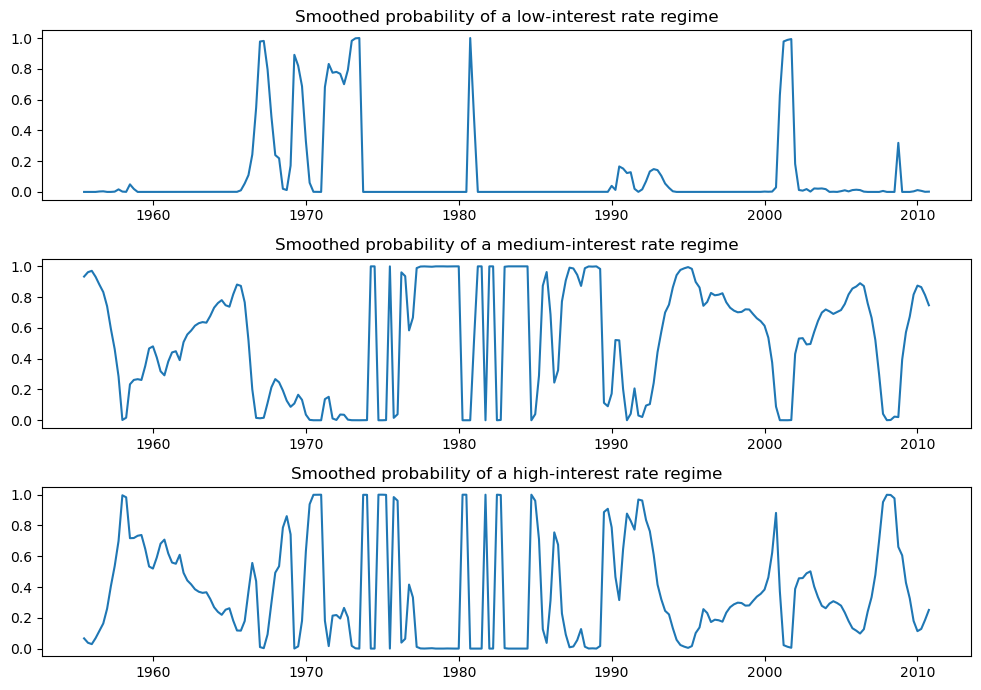

In [14]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-interest rate regime")

ax = axes[1]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-interest rate regime")

ax = axes[2]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-interest rate regime")

fig.tight_layout()


ー**株式市場への応用**ー

応答変数の変動性が変動する状況もモデル化できます。具体的には、以下のモデルを使います。

$$y_t=\mu_{s_t}+y_{t-1}\beta_{S_t}+\varepsilon_t \;\;\; \varepsilon_t \sim N(0,\sigma_{S_t}^2)$$

このモデルのパラメータ：$p_{00}, p_{10}, \mu_0, \mu_1, \beta_0, \beta_1, \sigma_0^2, \sigma_1^2$は最尤法によって推定されます。

この適用例は株式の絶対リターンに関するもので、これは実際の応答変数の変動性が異なるレジーム間で変化することを意味します。具体的には、モデル内の誤差項 $\varepsilon_t$ の分散 $\sigma_{S_t}^2$ が、異なるレジーム（状態）$S_t$に応じて変動することを指します。


- **モデルの誤差項:** モデルの誤差項 $\varepsilon_t \sim N(0,\sigma_{S_t}^2)$ において、$\sigma_{S_t}^2$ は各時点での分散を示しており、これが異なるレジームによって変わることを意味しています。

- **分散のレジーム依存:** このアプローチにより、時系列データの変動性（分散）が時間とともに、または異なるレジームによって変化する可能性があることをモデル化できます。


- **応答変数の幅:** 応答変数（この場合は株式の絶対リターン）の「幅」は、その変動性（分散）を反映します。より変動性の高い期間では、リターンの幅が広がります。

- **分散と応答変数:** この文脈では、分散は応答変数の変動性を示しており、応答変数そのものではありません。つまり、リターンそのものではなく、リターンの変動幅が異なるレジームによって変化すると解釈されます。


このモデルでは、異なるレジームにおける時系列データ（この場合は株式のリターン）の変動性が異なるという点を捉えています。これは、市場の異なる状態がリスク（変動性）のレベルにどのように影響するかを理解するのに有効なアプローチです。

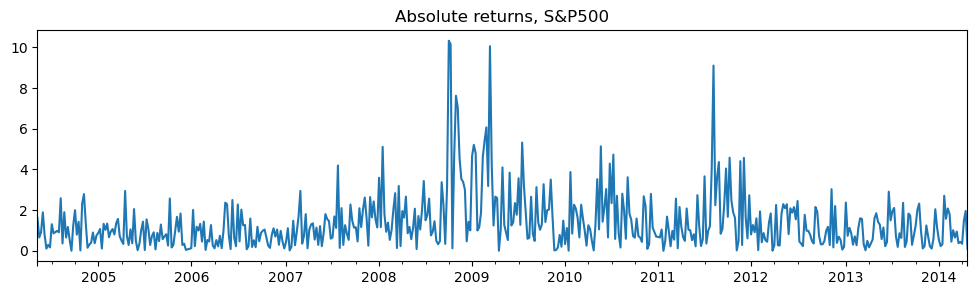

In [15]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import areturns

dta_areturns = pd.Series(
    areturns, index=pd.date_range("2004-05-04", "2014-5-03", freq="W")
)

# Plot the data
dta_areturns.plot(title="Absolute returns, S&P500", figsize=(12, 3))

# Fit the model
mod_areturns = sm.tsa.MarkovRegression(
    dta_areturns.iloc[1:],
    k_regimes=3,
    exog=dta_areturns.iloc[:-1],
    switching_variance=True,
)
res_areturns = mod_areturns.fit()


In [16]:
res_areturns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  520
Model:               MarkovRegression   Log Likelihood                -703.673
Date:                Wed, 17 Jan 2024   AIC                           1437.346
Time:                        03:12:00   BIC                           1501.153
Sample:                    05-16-2004   HQIC                          1462.342
                         - 04-27-2014                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3153      0.038      8.309      0.000       0.241       0.390
x1            -0.0096      0.015     -0.626      0.531      -0.040       0.021
sigma2         0.0337      0.009      3.763      0.000       0.016       0.051
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9525      0.121      7.903      0.000       0.716       1.189
x1             0.1876      0.041      4.570      0.000       0.107       0.268
sigma2         0.3765      0.061      6.210      0.000       0.258       0.495
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1505      0.327      6.569      0.000       1.509       2.792
x1             0.7161      0.106      6.741      0.000       0.508       0.924
sigma2         2.3394      0.430      5.438      0.000       1.496       3.183
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2373      0.075      3.158      0.002       0.090       0.385
p[1->0]        0.2479      0.055      4.529      0.000       0.141       0.355
p[2->0]        0.1822      0.061      2.977      0.003       0.062       0.302
p[0->1]        0.4288      0.125      3.439      0.001       0.184       0.673
p[1->1]        0.6150      0.058     10.647      0.000       0.502       0.728
p[2->1]        0.6212      0.073      8.513      0.000       0.478       0.764
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

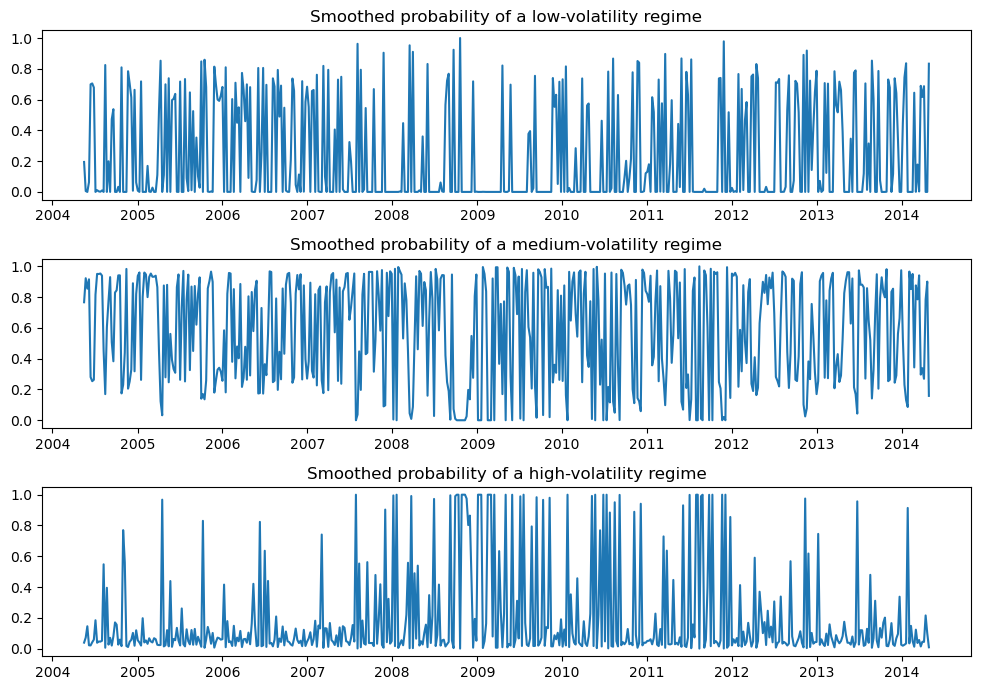

In [17]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_areturns.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-volatility regime")

ax = axes[1]
ax.plot(res_areturns.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-volatility regime")

ax = axes[2]
ax.plot(res_areturns.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-volatility regime")

fig.tight_layout()


In [18]:
from pandas_datareader.data import DataReader
from datetime import datetime
import pandas as pd

# S&P 500データの読み込み
#sp500 = DataReader("SP500", "fred", start=datetime(2014, 1, 1), end=datetime(2024, 4, 28)).dropna()
#sp500.to_csv('SP500.csv')#,index=False)
sp500 = pd.read_csv('SP500.csv', parse_dates=['DATE'])
x=pd.DataFrame(sp500.SP500)
x.index=sp500.DATE
sp500=x

<AxesSubplot:xlabel='DATE'>

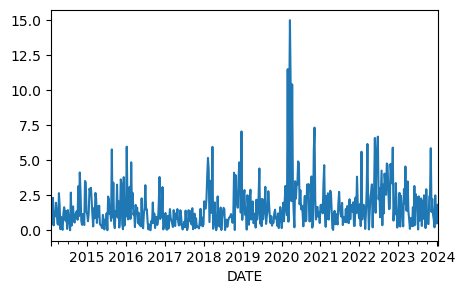

In [19]:
a=(np.abs(sp500['SP500'].pct_change(5)*100)).resample('1w').last().dropna()
a.plot(figsize=(5, 3))

In [20]:
mod_areturns = sm.tsa.MarkovRegression(
    a.iloc[1:],
    k_regimes=3,
    exog=a.iloc[:-1],
    switching_variance=True,
)
res_areturns = mod_areturns.fit()

In [21]:
res_areturns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  SP500   No. Observations:                  520
Model:               MarkovRegression   Log Likelihood                -790.076
Date:                Wed, 17 Jan 2024   AIC                           1610.151
Time:                        03:12:03   BIC                           1673.959
Sample:                    02-02-2014   HQIC                          1635.147
                         - 01-14-2024                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3699      0.082      4.519      0.000       0.210       0.530
x1             0.0455      0.036      1.273      0.203      -0.025       0.116
sigma2         0.0682      0.021      3.289      0.001       0.028       0.109
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5097      0.119     12.726      0.000       1.277       1.742
x1             0.0271      0.054      0.505      0.613      -0.078       0.132
sigma2         0.6270      0.094      6.693      0.000       0.443       0.811
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0943      0.539      5.737      0.000       2.037       4.151
x1             0.4296      0.169      2.536      0.011       0.098       0.762
sigma2         5.3399      1.133      4.713      0.000       3.119       7.561
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2976      0.084      3.522      0.000       0.132       0.463
p[1->0]        0.3202      0.059      5.441      0.000       0.205       0.435
p[2->0]        0.1214      0.110      1.108      0.268      -0.093       0.336
p[0->1]        0.6889      0.098      7.018      0.000       0.497       0.881
p[1->1]        0.5270      0.067      7.842      0.000       0.395       0.659
p[2->1]        0.4796      0.131      3.649      0.000       0.222       0.737
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

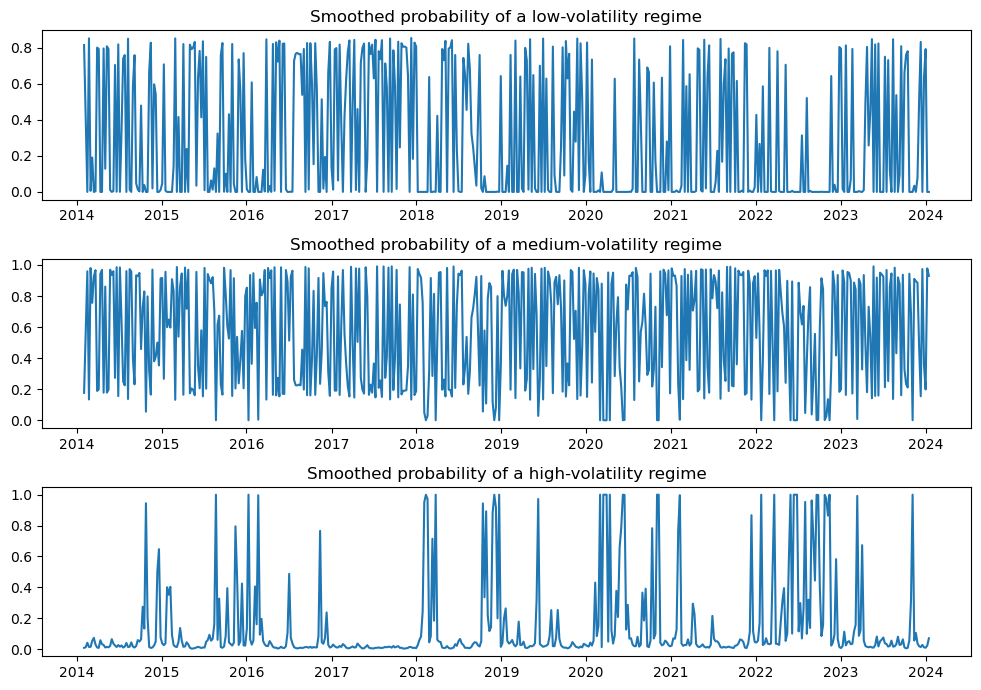

In [22]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_areturns.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-volatility regime")

ax = axes[1]
ax.plot(res_areturns.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-volatility regime")

ax = axes[2]
ax.plot(res_areturns.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-volatility regime")

fig.tight_layout()


### 3.2.4 VARMAX

statsmodels の VARMAX クラスでは、order 引数を通じてVAR、VMA、VARMA モデルの選択が可能であり、オプションでtrend 引数を通じて定数項を含むことができます。この方法で時間トレンドを追加することができます。exog 引数によって外生的回帰変数も含めることができます。

一般的に、VARMAXモデルは以下のように指定されます:
$$ y_t=\nu+A_1y_{t-1}+\cdots+A_py_{t-p}+Bx_t+\epsilon_t+M_1\epsilon_{t-1}+\cdots+M_q\epsilon_{t-q} $$

ここで、$\epsilon_t \sim N(0,\Omega)$ であり、$y_t$ は k_endog x 1 のベクトルです。さらに、このモデルは変数が誤差を伴って測定される場合を考慮することができます。最後に、このクラスでは測定誤差をmeasurement_error 引数を通じて許容し、対角行列または非構造的なイノベーションの共分散行列をerror_cov_type 引数を通じて指定することができます。

ー状態空間表現ー

状態空間モデルを構築するためには、観測方程式と状態方程式を定義する必要があります。VARMAXモデルの簡単な状態空間モデルを表現しましょう。ただし、この例は概念的なものであり、特定のVARMAXモデルの詳細によって異なる可能性があります。

＊観測方程式＊

観測方程式は、観測されたデータ $ y_t $ と内部状態変数 $ \alpha_t $ との関係を定義します。外生変数 $ x_t $ も含まれます。

$$ y_t = Z \alpha_t + B x_t + \epsilon_t $$
ここで、
- $ y_t $ は時刻 $ t $ での観測されたベクトル（例えば、経済指標や金融時系列データ）。
- $ \alpha_t $ は時刻 $ t $ での状態ベクトル。
- $ Z $ は観測行列で、状態ベクトルを観測ベクトルに変換します。
- $ B $ は外生変数に関連する行列。
- $ x_t $ は外生変数のベクトル。
- $ \epsilon_t $ は観測ノイズ、通常は正規分布に従います。

＊状態方程式＊

状態方程式は、状態変数 $ \alpha_t $ の時間的進化を記述します。

$$ \alpha_{t+1} = T \alpha_t + c + R \eta_t $$
ここで、

- $ \alpha_{t+1} $ は時刻 $ t+1 $ での状態ベクトル。
- $ T $ は状態遷移行列で、時刻 $ t $ から $ t+1 $ への状態の進化を表します。
- $ c $ は状態方程式における定数ベクトル（または外生的な入力）。
- $ R $ はノイズ行列で、状態ノイズに対する影響を表します。
- $ \eta_t $ は状態ノイズで、通常は正規分布に従います。

これらの方程式は、状態空間モデルの基礎を形成し、時系列データの構造とダイナミクスを捉えます。VARMAXモデルでは、これらの方程式は、内生変数、外生変数、およびそれらの相互作用をモデル化するために調整されます。

最適化プロセスでは、これらの方程式に基づいてモデルのパラメーター（$ T $, $ Z $, $ B $, $ R $, $ c $など）が推定されます。これには通常、最尤法やベイジアン推定法などの統計的推定手法が使用されます。

特定のVARMAXモデルの場合、これらの方程式はさらに複雑になり得ますが、上記は一般的な状態空間モデルの構造を示す基本的な例です。

ー尤度関数ー

状態空間モデルの尤度関数を作成するには、モデルの観測方程式と状態方程式から導出される確率分布に基づいて計算を行います。簡単化のために、通常、ノイズ成分 $ \epsilon_t $ と $ \eta_t $ が独立で正規分布に従うと仮定します。それに基づいた尤度関数の基本的な形式を示します。

尤度関数は、与えられたパラメータセットの下で観測データが得られる確率を表します。状態空間モデルでは、以下のように表現できます。

尤度関数 $ L(\Theta; Y) $ は、モデルパラメータ $ \Theta $ と観測データ $ Y = \{y_1, y_2, \ldots, y_T\} $ に対する条件付き確率です。尤度関数は通常、観測データの確率密度関数の積として表されます。

$$ L(\Theta; Y) = \prod_{t=1}^{T} f(y_t | y_{1:t-1}; \Theta) $$

ここで、$ f(y_t | y_{1:t-1}; \Theta) $ は時刻 $ t $ での観測 $ y_t $ の条件付き確率密度関数で、モデルパラメータ $ \Theta $ と過去の観測 $ y_{1:t-1} $ に依存します。

状態空間モデルでは、この確率密度関数は通常、カルマンフィルタを使用して再帰的に計算されます。カルマンフィルタは、各時点での状態変数の推定と、その推定に基づく観測値の確率分布を提供します。

最尤推定では、この尤度関数を最大化するパラメータ $ \Theta $ を見つけることが目的です。実際には、尤度関数の対数（対数尤度関数）を取ることが一般的です。これにより、積の代わりに和を扱うことができ、計算が容易になります。

$$ \log L(\Theta; Y) = \sum_{t=1}^{T} \log f(y_t | y_{1:t-1}; \Theta) $$

この対数尤度関数を最大化することで、最適なモデルパラメータを推定します。尤度関数の正確な形式は、モデルの具体的な仕様（観測方程式と状態方程式の形式、ノイズの分布など）に依存します。

例 1: VAR

モデルは、`dln_inv`（在庫への投資の対数差）、`dln_inc`（所得の対数差）、および `dln_consump`（消費の対数差）という3つの変数を含む時系列データセット `lutkepohl2` に基づいています。

ーデータについてー

- `sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')`: `statsmodels` から `lutkepohl2` データセットを読み込みます。
- `dta.index = dta.qtr; dta.index.freq = dta.index.inferred_freq`: データセットのインデックスを四半期（`qtr`）に設定し、その頻度を推定しています。
- `endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]`: 分析に使用する期間を1960年第2四半期から1978年第4四半期に限定し、`dln_inv`、`dln_inc`、`dln_consump`の3つの変数を内生変数（endogenous variables）として選択しています。

ーVARMAXー

- `exog = endog['dln_consump']`: 外生変数（exogenous variable）として `dln_consump` を選択しています。
- `mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='n', exog=exog)`: VARMAXモデルを定義しています。ここで `order=(2,0)` は、VAR部分が2次（2期のラグを含む）であり、MA部分は含まれないことを意味します。`trend='n'`はトレンド成分がないことを示しています。

ー経済現象に対する仮説とモデル化

- **モデル選択**: この場合、投資（`dln_inv`）と所得（`dln_inc`）の動態が消費（`dln_consump`）に影響される可能性があると仮定し、その分析にVARMAXモデルを用いています。これは、複数の時系列間の相互作用と外生的な影響を同時にモデル化するために有効だからです。
- **外生変数の使用**: 消費の変動が投資や所得に与える影響を捉えるために`dln_consump` を外生変数としてモデルに組み込んでいます。これは、経済的な分析において消費が他の経済指標に影響を与えるという仮説を検証しています。
- **トレンド成分の除外**: `trend='n'` の選択は、分析対象の時系列データにトレンド成分が存在しない、またはトレンドをモデル化する必要がないと判断しています。トレンド成分を除外することで、モデルはデータの季節性や周期性のみに焦点を当てることができます。
- **モデルの次数**: 時系列データの短期間の動的関係を捉えるために、VAR部分の次数を2に設定しています。モデルは過去2期間のデータを現在の値の予測に使用することができます。

尤度推定を収束させるために、デフォルト（maxiter=50）よりも多くの反復を許容しました。これは、多くのパラメータを推定しなければならない VAR モデルでは珍しくなく、しばしば比較的少ない数の時系列で行われます：例えば、このモデルは3つの変数の75の観測から27のパラメータを推定しています。

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')
dta.index = dta.qtr
dta.index.freq = dta.index.inferred_freq
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]
endog.to_csv('endog.csv')#,index=False)

In [24]:
data = pd.read_csv('endog.csv', parse_dates=['qtr'])
data.index=data.qtr
data.index.freq = data.index.inferred_freq
endog=data.iloc[:,1:]

In [25]:
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='n', exog=exog)
#mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='t')
#mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(0,1), trend='n',exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 361.038
Date:                    Wed, 17 Jan 2024   AIC                           -696.076
Time:                            03:12:04   BIC                           -665.949
Sample:                        04-01-1960   HQIC                          -684.047
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.06, 10.08   Jarque-Bera (JB):          11.27, 2.49
Prob(Q):                        0.81, 0.00   Prob(JB):                   0.00, 0.29
Heteroskedasticity (H):         0.45, 0.40   Skew:                      0.16, -0.39
Prob(H) (two-sided):            0.05, 0.03   Kurtosis:                   4.87, 3.45


推定結果は、VARX(2)モデルを用いて得られたもので、内生変数として`dln_inv`（在庫への投資の対数差）と`dln_inc`（所得の対数差）、外生変数として`dln_consump`（消費の対数差）が使用されています。

1. **モデルの統計的適合性**: 対数尤度は361.031で、AICとBICはそれぞれ-696.062と-665.935です。これらはモデルがデータに良く適合していることを示しています。しかし、Ljung-Box検定の結果やJarque-Bera検定の結果から、モデルの残差に関していくつかの統計的問題がありそうです。

2. **係数の解釈**: `dln_inv`方程式では、`L1.dln_inv`（-0.2418）が統計的に有意で、過去の`dln_inv`の値が現在の値に負の影響を与えていることを示しています。一方、`dln_inc`方程式では、`L1.dln_inv`（0.0621）が若干の正の影響を示していますが、統計的に有意ではありません。

3. **外生変数の影響**: `beta.dln_consump`の係数は両方の方程式で正で、特に`dln_inv`方程式では統計的に有意です。これは、消費の増加が投資と所得の増加に関連している可能性を示唆しています。

ー表現行列ー

VARX(2)モデルの表現行列は、各ラグの自己回帰係数により構成されています。このモデルでは、`dln_inv`と`dln_inc`の2変量に対して2つのラグがありますので、次のように表現行列を作成できます：

- **1期前のラグ（L1）の表現行列**:
  \[ A_1 = \begin{bmatrix} -0.2418 & 0.2763 \\ 0.0621 & 0.0806 \end{bmatrix} \]
- **2期前のラグ（L2）の表現行列**:
  \[ A_2 = \begin{bmatrix} -0.1666 & 0.0537 \\ 0.0120 & 0.0281 \end{bmatrix} \]

表現行列の各要素は、それぞれの時系列が1期前と2期前のそれぞれの値にどのように影響されるかを示しています。例えば、`A_1`の第一行第一列の要素（-0.2418）は、`dln_inv`の1期前の値が現在の`dln_inv`に与える影響を示しており、負の係数は過去の高い値が現在の値を減少させることを示唆しています。

ー結論ー

モデルの残差に関する統計的な問題や、最尤法の最適化の収束に関する警告は、モデルの仕様や推定結果の解釈に注意を要します。特に、残差の自己相関や正規性の問題は、モデルの適切性に疑問を投げかける可能性があります。したがって、モデルの再評価や他のモデル仕様の検討が必要になるかもしれません。また、外生変数の選択とその影響の解釈にも注意が必要です。

ーインパルス応答－

推定されたVARモデルから、内生変数のインパルス応答関数をプロットすることができます。

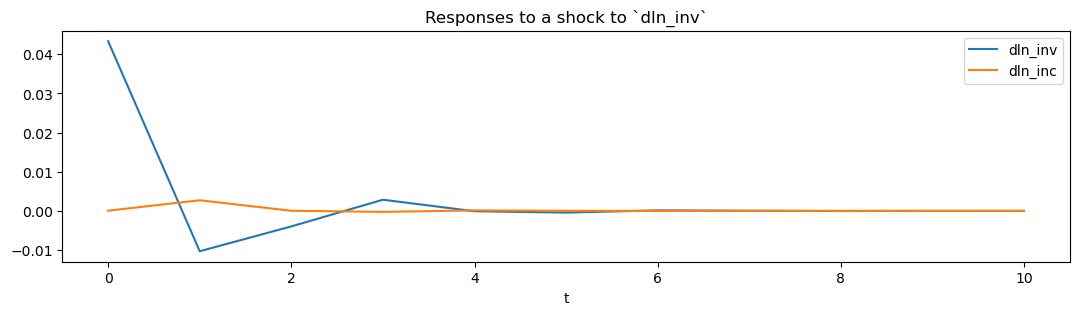

In [26]:
ax = res.impulse_responses(10, orthogonalized=True, impulse=[1, 0]).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

ベクトル自己回帰（VAR）モデルの推定結果 `res` から、特定のショックに対するインパルス応答関数（IRF）を計算し、プロットしています。このコードを解説します。

1. **Impulse Response Function の計算**：
   - `res.impulse_responses(10, orthogonalized=True, impulse=[1, 0])` は、VARモデル `res` のインパルス応答を計算しています。
   - 引数 `10` は、インパルス応答を計算する期間（ここでは10期間）を指定しています。
   - `orthogonalized=True` は、オーソゴナル化（直交化）されたインパルス応答を計算することを意味します。これは、ショックが相関していないと仮定して、それぞれの変数に独立したショックを与える方法です。
   - `impulse=[1, 0]` は、最初の変数（ここでは `dln_inv`）に対してショックを与えることを意味します。このショックは他の変数には影響を与えません。

2. **グラフのプロット**：
   - この関数は、計算されたインパルス応答をプロットします。`figsize=(13,3)` はグラフのサイズを指定しています。
   - `ax.set(xlabel='t', title='Responses to a shock to `dln_inv`')` は、グラフのx軸ラベルを 't' に設定し、タイトルを 'Responses to a shock to `dln_inv`' に設定しています。

このコードの結果として、`dln_inv` という変数にショックを与えたときに、VARモデルの他の変数がどのように反応するかを表すグラフが得られます。これは、`dln_inv` に対する政策変更や外部的なショックが、モデル内の他の変数に及ぼす影響を理解するのに役立ちます。グラフの解釈では、ショック後の各変数の反応の程度や動的な変化を観察することが重要です。

ー例 2：VMAー

ベクトル移動平均モデルを定式化します。イノベーションが無相関であるVMA(2)を用います。この例では外生的回帰変数を省略しますが、定数項を含めることにします。

VAR部分の次数を0に、MA部分の次数を2に設定しています。つまり、VAR(0,2)モデルとして機能します。これは、過去の値（ラグ）に基づく自己回帰（VAR）要素を含まず、代わりに過去の誤差（ショック）に基づく移動平均（MA）要素に重点を置くことを意味します。

- **MAモデルの選択**: MA部分の次数を2に設定することは、過去のショックが現在の時系列値に影響を与えるという考えに基づいています。これは、データがランダムなショックからの影響を受ける可能性がある場合、または自己回帰的な要素が明確でない場合に適切な選択です。
- **外生変数の欠如**: 新しいモデル定義では、外生変数 `dln_consump` が含まれていません。この変更は、外生変数がモデルのダイナミクスに与える影響を考慮しないことを意味し、モデルが内生変数のみに基づいて動的な関係を捉えることになります。
- **エラー共分散タイプ**: `error_cov_type='diagonal'` の設定は、異なる方程式の誤差項間の共分散が0であると仮定しています。これは、各時系列のショックが他の時系列に直接的な影響を与えないという仮定に基づいています。

- **反復回数の増加**: `maxiter=1000` は、収束に必要な反復回数を増やすことを意味します。これは、特に多くのパラメータを推定する場合や、モデルが複雑である場合に役立ちます。

MAモデルの選択は、データがランダムなショックや不規則な変動から影響を受ける場合に適していますが、データの時系列的な特徴や過去の値の影響を無視するという意味合いもあります。また、外生変数を含めないことは、モデルが内生変数間の動的関係にのみ焦点を当てることを意味し、消費の影響を考慮しないことになります。

結果として、このモデルは過去の内部的なダイナミクスよりも、過去のショックの影響を重視することになります。これは、データにおけるランダムな変動や一時的なショックが重要な役割を果たす場合に特に有効なアプローチです。

In [27]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(0,2), error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                             VMA(2)   Log Likelihood                 353.888
                              + intercept   AIC                           -683.777
Date:                    Wed, 17 Jan 2024   BIC                           -655.967
Time:                            03:12:06   HQIC                          -672.673
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.00, 0.05   Jarque-Bera (JB):         12.66, 13.60
Prob(Q):                        0.95, 0.82   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.44, 0.81   Skew:                      0.06, -0.48
P

- **対数尤度**: 353.887で、モデルはデータに適合していることを示唆しています。
- **AICとBIC**: -683.775と-655.965で、モデルの適合度と複雑さのバランスを示しています。
- **Ljung-Box検定**: 自己相関はほとんど存在しないことを示しています。
- **Jarque-Bera検定**: 正規分布からの逸脱があり、残差に非正規性がある可能性を示唆しています。
- **Heteroskedasticity検定**: 一定の不均一分散の兆候があります。

- **係数**: `L1.e(dln_inv)`、`L1.e(dln_inc)`、`L2.e(dln_inv)`、`L2.e(dln_inc)`は、それぞれ1期前と2期前の誤差項が現在の値に与える影響を示しています。
- `dln_inv`の方程式では、`L1.e(dln_inv)`が統計的に有意で、負の係数は過去の誤差が現在の値を減少させることを示しています。

ー表現行列ー

VMA(2)モデルの場合、表現行列は移動平均部分の係数を含みます。このモデルでは、以下のような2x2の表現行列があります：

- **1期前の誤差項の影響（L1）**:
  \[ B_1 = \begin{bmatrix} -0.2562 & 0.5140 \\ 0.0475 & -0.0758 \end{bmatrix} \]
- **2期前の誤差項の影響（L2）**:
  \[ B_2 = \begin{bmatrix} 0.0286 & 0.1879 \\ 0.0186 & 0.1224 \end{bmatrix} \]

これらの行列は、過去の誤差項が現在の各変数に与える影響を示しています。例えば、`B_1`の第一行第一列の要素（-0.2562）は、1期前の`dln_inv`の誤差が現在の`dln_inv`に与える影響を示しています。

ーサマリーレポートからの結論ー

このVMA(2)モデルは、特定の経済データの動的な挙動を分析するための重要なツールです。しかし、モデルの残差に関するJarque-Bera検定の結果や、不均一分散の兆候は、モデルの仮定や適切性に関する懸念を引き起こします。そのため、モデルの再評価や他のモデル仕様の検討が必要かもしれません。また、外生変数を含めないことによる影響も考慮する必要があります。


#### VAR(2)モデルとVMA(2)モデルのサマリーレポートの結果を比較

どちらのモデルがデータに適しているかを判断するために、いくつかの重要な点を考慮する必要があります。

##### VAR(2)モデル
- **自己回帰モデル**: 過去の値が現在の値にどのように影響しているかを分析します。
- **統計的適合性**: AICやBICが比較的低く、モデルがデータに適合していることを示唆しています。
- **係数の有意性**: 一部の係数が統計的に有意で、特定のラグが現在の値に影響を与えていることを示しています。
- **残差の性質**: 正規性の問題や不均一分散の兆候があるかもしれません。

##### VMA(2)モデル
- **移動平均モデル**: 過去の誤差（ショック）が現在の値にどのように影響しているかを分析します。
- **統計的適合性**: VAR(2)と比較して、AICやBICが高くなっています。
- **係数の有意性**: 一部の係数が有意でないことがあり、ショックの影響が不明瞭な場合があります。
- **残差の性質**: VAR(2)と同様に、正規性の問題や不均一分散の兆候があります。

##### 選択における考慮事項
1. **モデルの適合度**: AICやBICが低いモデルは、一般にデータにより適していると考えられます。この基準では、VAR(2)モデルがVMA(2)モデルより適切な可能性が高いです。

2. **統計的有意性**: 統計的に有意な係数を持つモデルは、データのダイナミクスをより良く捉えていることを示します。VAR(2)モデルの方がいくつかの係数が有意であり、これもVAR(2)を支持する要因となります。

3. **経済理論との整合性**: モデルが経済理論や実証分析の目的と整合しているかどうかも重要です。例えば、過去の値が現在の値に影響を与えるという経済的ダイナミクスを探求する場合、VARモデルが適切かもしれません。

4. **残差の性質**: どちらのモデルも正規性の問題や不均一分散の兆候を示しているため、残差の分析と改善が必要です。

##### 結論
これらの点を総合的に考慮すると、VAR(2)モデルがVMA(2)モデルより優れている可能性が高いです。しかし、最終的な選択は分析の目的やデータの特性、経済理論との整合性に基づいて行う必要があります。また、残差の診断とモデルの改善を行い、他のモデル仕様（例えば、異なるラグの長さや外生変数の導入）との比較も検討することが推奨されます。

ー注意：VARMA(p,q) の仕様についてー

このモデルではVARMA(p,q)の仕様を推定することができますが、表現行列に追加の制約がなければ、これらのモデルは特定されません。これらの制約は組み込まれていないため、ユーザーはエラー（実際にはこれらのモデルが指定されたときに警告が発行される）に注意して進めることを推奨します。それにもかかわらず、これらのモデルは特定の状況下で有用な情報を提供することがあります。


この注意書きは、VARMA（ベクトル自己回帰移動平均）モデルの使用に関する重要な警告を提供しています。VARMAモデルは、ベクトル自己回帰（VAR）モデルと移動平均（MA）モデルを組み合わせたもので、時系列データの分析において非常に柔軟ですが、特定の課題があります。

1. **識別の問題**: VARMAモデルは、表現行列に追加の制約がないと特定されません。これは、与えられた時系列データに対して、複数の異なるパラメータセットが同じデータを生成する可能性があることを意味します。そのため、モデルのパラメータ推定が一意でない可能性があります。

2. **追加の制約の必要性**: VARMAモデルを適切に識別するためには、表現行列に追加の制約を加える必要がありますが、これらの制約はモデルに組み込まれていません。これは、ユーザーが自分でこれらの制約を理解し適用する必要があることを意味します。

3. **使用時の警告**: VARMAモデルを使用する際には、これらの識別の問題に関する警告が発行されます。これは、ユーザーがこれらのモデルを使用する際に特別な注意を払うべきであることを示唆しています。

4. **特定の状況下での有用性**: この注意書きはまた、特定の状況下ではVARMAモデルが有用な情報を提供する可能性があることを指摘しています。これは、モデルが特定のデータセットや分析の目的に適している場合に限られます。

VARMA(1,1)モデルを構築します。このモデルは、`dln_inv`（在庫への投資の対数差）と`dln_inc`（所得の対数差）を内生変数としています。

- `order=(1,1)`: このモデルは、1期前の自己回帰（VAR）部分と1期前の移動平均（MA）部分を組み合わせています。VAR部分は時系列の過去の値が現在の値に与える影響を、MA部分は過去の誤差項が現在の値に与える影響を捉えます。

1. **識別の問題**: 前述の通り、VARMAモデルは追加の制約なしには特定されない可能性があります。これは、同じ時系列データに対して複数の異なるパラメータセットが同じデータを生成する可能性があることを意味します。

2. **モデルの複雑さ**: VARMAモデルは、VARモデルやMAモデルよりも複雑であり、パラメータの推定が難しい場合があります。この複雑さは、特にデータサンプルが小さい場合に問題となることがあります。


In [28]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(1,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())


C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                         VARMA(1,1)   Log Likelihood                 354.285
                              + intercept   AIC                           -682.571
Date:                    Wed, 17 Jan 2024   BIC                           -652.443
Time:                            03:12:07   HQIC                          -670.541
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.01, 0.05   Jarque-Bera (JB):         10.87, 13.93
Prob(Q):                        0.91, 0.83   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.43, 0.91   Skew:                      0.00, -0.45
P

- **対数尤度**: 354.289で、モデルがデータに適合していることを示唆しています。
- **AICとBIC**: -682.577と-652.450で、モデルの適合度と複雑さのバランスを示しています。
- **Ljung-Box検定**: 自己相関はほとんどないことを示しています。
- **Jarque-Bera検定**: 正規分布からの逸脱があり、残差に非正規性がある可能性を示唆しています。
- **Heteroskedasticity検定**: 不均一分散の兆候があります。

- **係数**: ほとんどの係数が統計的に有意ではありません。これは、モデルがデータのダイナミクスを捉えるのに十分ではない可能性を示唆しています。

ーVARMA(1,1)モデルの識別問題ー

- `EstimationWarning`メッセージは、VARMAモデルの推定が一般的に堅牢ではないこと、特に識別問題によるものであることを警告しています。この警告は、VARMAモデルが複数の異なるパラメータセットで同じ時系列データを生成する可能性があることを指摘しています。結果として、モデルのパラメータ推定が一意でない可能性があります。

- **VARMA(1,1) vs VAR(2)とVMA(2)**: VARMA(1,1)モデルの統計的適合性は、以前のVAR(2)やVMA(2)モデルと比較しても良好ですが、識別問題の警告により、モデルの信頼性に疑問が投げかけられます。また、多くの係数が統計的に有意でないことは、VARMA(1,1)モデルがデータのダイナミクスを十分に捉えていない可能性を示しています。

##### 結論

このVARMA(1,1)モデルの結果を考慮すると、特に識別問題の警告を鑑みて、VAR(2)やVMA(2)モデルの方がより信頼性が高いかもしれません。VARMA(1,1)モデルはデータに適合している可能性がありますが、統計的に有意な係数が少ないことや、モデルの識別に関する一般的な警告は、このモデルの結果に対する慎重な解釈を要求します。最終的なモデルの選択は、データの特性、分析の目的、およびモデルの統計的適合性に基づいて行うべきです。VARMA(1,1)モデルは、特定の状況下で有用な情報を提供する可能性がありますが、その使用には特に注意が必要です。

モデルの適切性をさらに検証するためには、残差の分析（自己相関、非正規性、不均一分散など）や、他のモデル仕様（異なるラグの長さや外生変数の導入）との比較が推奨されます。これにより、最もデータに適したモデルを選択し、より信頼性の高い結果を得ることができます。

### 3.2.5 動的因子モデル

Statsmodelsには、動的因子モデルをサポートする2つのクラスがあります：DynamicFactorMQとDynamicFactorです。これらのモデルはそれぞれに強みがありますが、一般的にはDynamicFactorMQクラスの使用が推奨されます。これは、Expectation-Maximization（EM）アルゴリズムを使用してパラメータを推定するため、より堅牢であり、数百の観測された系列を含めることができます。さらに、どの変数がどの因子にロードするかのカスタマイズを可能にします。しかし、外生変数を含める機能はまだサポートしていませんが、DynamicFactorはその機能をサポートしています。

EMアルゴリズムを用いた動的因子モデル；月次/四半期データのオプション。

"BańburaとModugno（2014）([1])およびBańbura、Giannone、Reichlin（2011）([2])による動的因子モデルの実装です。パラメーター推定にEMアルゴリズムを使用しており、多数の応答変数を扱うことが可能です。このモデルの仕様には、異なる自己回帰の階数を持つ因子ブロックの任意の組み合わせを含めることができ、また、固有の変動をモデル化するためのAR(1)プロセスも組み込むことができます。MarianoとMurasawa（2011）([4])の方法に従い、月次と四半期の混合頻度データを取り入れることが可能です。このモデルの特別な事例として、Bokら（2017）([3])のナウキャスティングモデルがあります。さらに、このモデルは更新されたデータリリースに関連するニュースを計算するためにも利用できます。"

基本モデルは以下の通りです：

$$y_t=\Lambda f_t+\epsilon_t$$
$$f_t=A_1 f_{t-1}+\cdots+A_p f_{t-p}+u_t$$

ここで：

$y_t$ は時刻 $t$ での観測データ

$\epsilon_t$ は時刻 $t$ での固有の変動（この用語における連続相関のモデリングを含む、詳細については以下参照）

$f_t$ は時刻 $t$ での観測されない因子

$u_t \sim N(0,\mathbf{Q})$ は時刻 $t$ での因子変動

また：

$\Lambda$ は因子負荷の行列として言及されます

$A_i$ は自己回帰係数の行列

さらに、固有の障害が連続相関を持つことを許容しており、$idiosyncratic_ar1=True$の場合、$\epsilon_{i,t}=\rho_i \epsilon_{i,t-1}$ となります。ここで $e_{i,t} \sim N(0,\sigma_i^2$ です。$idiosyncratic_ar1=False$の場合は、$\epsilon_{i,t}=e_{i,t}$ となります。

この基本的な設定は [1]、[2]、[3]、[4] で見つけることができます。

このモデルには2つの一般化が可能です：

[2] に従い、他の因子のブロックと独立した複数の「ブロック」の因子を許容します。異なるブロックは異なる観測変数のサブセットにロードすることができ、異なるラグオーダーで指定することができます。

[4] および [2] に従い、月次および四半期データの両方を使用する混合頻度モデルを許容します。詳細については、以下の「混合頻度モデル」のセクションを参照してください。

追加の注記：

観測データには任意の欠損パターンが含まれる場合があります。

EMアルゴリズム

このモデルには非常に多くのパラメータが含まれる可能性があり、擬似ニュートン法を使用して尤度関数を数値的に最適化するのは困難で、禁じ手となる時間がかかることがあります。代わりに、このモデルでのデフォルトのフィッティング方法は [1] で詳細に説明されているように、EMアルゴリズムを使用します。その結果、モデルは数百の観測変数を持つデータセットを処理できます。

混合頻度データ

このモデルは、2つの方法で混合頻度データを扱うことができます。このセクションではこれを簡単に説明し、すべての詳細については [2] と [4] を参照してください。

まず、観測ベクトルに欠損データの任意のパターンがあるため、より低い頻度の変数を特定のより高い頻度の期間で観測されたものとして単純に含め、それ以外は欠損とすることができます。例えば、月次モデルでは、四半期データを各四半期の第3月に発生するものとして含めることができます。この方法を使用するには、単にデータをより高い頻度での単一のデータセットに統合し、このモデルにendog引数として渡すだけです。ただし、分析に使用される変数のタイプとデータ生成プロセスに関する仮定によっては、このアプローチは有効ではない場合があります。

たとえば、実質GDPの成長率に関心があるとします。これは四半期頻度で測定されます。基本的な因子モデルが月次頻度で指定されている場合、各四半期の第3月に実際に観測される四半期成長率は、未観測の月次成長率の特定の加重平均によって近似されます。この特定の加重移動平均をモデルの構築に考慮する必要があり、これが2つ目のアプローチが行うことです。

2つ目のアプローチは [2] および [4] に従い、未観測の月次成長率に関して四半期成長率を明示的にモデル化するための状態空間形式を構築します。このアプローチを使用するには、2つの方法があります：

月次および四半期データを月次頻度での単一のデータセットに統合し、月次データを最初の列に、四半期データを最後の列に配置します。このデータセットをモデルにendog引数として渡し、月次変数の数をk_endog_monthly引数として与えます。

月次データセットを月次頻度でのDatetimeIndexまたはPeriodIndexを持つPandas DataFrameとして構築し、別途四半期データセットを四半期頻度でのDatetimeIndexまたはPeriodIndexを持つPandas DataFrameとして構築します。月次DataFrameをモデルにendog引数として渡し、四半期DataFrameをモデルにendog_quarterly引数として渡します。

これは混合頻度データの1つの特定のタイプを組み込むだけであり、このフレームワークではサポートされていない他のタイプの混合頻度データに関しては、Banbura et al. (2013). “Now-Casting and the Real-Time Data Flow.” の議論も参照してください。

ナウキャスティングとニュース

月次/四半期混合頻度データのサポートを通じて、このモデルは月次観測に基づいて四半期変数のナウキャスティングを可能にします。特に、[2] と [3] は、実質GDPのナウキャストを構築し、リアルタイムベースでの新規データから派生した「ニュース」の影響を分析するためにこのモデルを使用します。この後者の機能は、結果オブジェクトのニュースメソッドを通じてアクセスできます。

データの標準化

動的因子モデルを定式化する際によくあるように、私たちは各観測変数の平均を明示的に考慮しません。代わりに、デフォルトの動作は推定前に各変数を標準化することです。したがって、与えられた観測データが 
 であれば、動的因子モデルは実際に以下で定義される標準化されたデータに基づいて推定されます：

$$ x_{i,t}=(y_{i,t}-\bar{y}_i)/s_i$$

ここで、
$\bar{y}_i$ はサンプル平均で、$s_i$ はサンプル標準偏差です。

デフォルトでは、推定前に標準化が適用される場合、インサンプル予測、アウトオブサンプル予測、および「ニュース」の計算などの結果は、元のデータのスケールで報告されます（つまり、モデル出力に逆変換が適用されてからユーザーに返されます）。

標準化は、モデルコンストラクタにstandardization=Falseを渡すことで無効にすることができます。

因子と負荷の識別

このモデルの推定された因子と因子負荷は、可逆変換までしか識別されません。[2] のワーキングペーパーバージョンに記載されているように、識別を達成するための標準化を課すことは可能ですが、EMアルゴリズムはそれにかかわらず収束します。さらに、ナウキャスティングや予測の目的では、識別は必要ありません。このモデルは因子と因子負荷を識別するための標準化を課しません。

雑多

モデルコンストラクタで利用可能な2つの引数はあまり使用されませんが、簡単に言及されるべきです：init_t0とobs_cov_diag。これらの引数は、基礎となる状態空間モデルの設定/適用方法にわずかな違いがある他のパッケージの出力に完全に一致させるために提供されています。

init_t0：Statsmodelsの状態空間モデルはDurbinとKoopmanに従ってモデルを$\alpha_1 \sim N(a_1,P_1)$で初期化します。他の実装では、代わりに$\alpha_0 \sim N(a_0,P_0)$で初期化することがあります。観測されたデータセットの先頭にNaNの行を前置することで、これを対応させることができます。

obs_cov_diag：[1]の状態空間形式は、観測残差共分散行列に非ゼロ（しかし非常に小さい）の対角要素を組み込んでいます。

参考文献

[1] (1,2,3,4)
Bańbura, Marta, and Michele Modugno. “Maximum likelihood estimation of factor models on datasets with arbitrary pattern of missing data.” Journal of Applied Econometrics 29, no. 1 (2014): 133-160.

[2] (1,2,3,4,5,6,7,8)
Bańbura, Marta, Domenico Giannone, and Lucrezia Reichlin. “Nowcasting.” The Oxford Handbook of Economic Forecasting. July 8, 2011.

[3] (1,2,3)
Bok, Brandyn

ーサンプルー


このモデルでは、3つの変数（'dln_inv', 'dln_inc', 'dln_consump'）を含む時系列データセットを用い、1つの共通因子（`f1`）とその1期のラグを持つダイナミックファクターモデルを推定しています。結果から、各変数に対する因子負荷量（`loading.f1`）が得られ、これは共通因子が各変数にどの程度影響を与えるかを示しています。また、共通因子自体の自己回帰係数（`L1.f1`）も推定されています。

このモデルは、複数の時系列が共通の根底にある因子によって動かされているという仮定に基づいています。このようなモデルは、異なる時系列間の隠れた関連性を捉えるのに有用です。

In [29]:
# ダイナミックファクターモデルの構築に必要なパッケージのインポート
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
import pandas as pd
# ダイナミックファクターモデルの定義
model = DynamicFactor(endog, k_factors=1, factor_order=1)

# モデルの推定
results = model.fit(maxiter=1000, disp=False)
results.summary()


Dep. Variable:,"['dln_inv', 'dln_inc', 'dln_consump']",No. Observations:,75
Model:,"DynamicFactor(factors=1, order=1)",Log Likelihood,590.032
Date:,"Wed, 17 Jan 2024",AIC,-1166.063
Time:,03:12:07,BIC,-1149.841
Sample:,04-01-1960,HQIC,-1159.586
,- 10-01-1978,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"4.13, 1.59, 16.63",Jarque-Bera (JB):,"40.50, 23.02, 6.95"
Prob(Q):,"0.04, 0.21, 0.00",Prob(JB):,"0.00, 0.00, 0.03"
Heteroskedasticity (H):,"0.35, 0.69, 0.37",Skew:,"0.42, -0.65, -0.23"
Prob(H) (two-sided):,"0.01, 0.36, 0.02",Kurtosis:,"6.50, 5.38, 4.42"


提供されたダイナミックファクターモデルのサマリーレポートは、`dln_inv`（在庫への投資の対数差）、`dln_inc`（所得の対数差）、`dln_consump`（消費の対数差）という3つの変数を含むデータセットに基づいています。このモデルは、1つの共通因子（`f1`）とその1期のラグを持つ構造で推定されています。

### モデルの統計的適合性
- **対数尤度**: 590.037で、モデルがデータに適合していることを示唆しています。
- **AICとBIC**: それぞれ-1166.074と-1149.852で、モデルの適合度と複雑さのバランスを示しています。

### 因子負荷量と因子の自己回帰
- **因子負荷量**: すべての変数に対する因子負荷量（`loading.f1`）は正で、統計的に有意です。これは、共通因子がこれらの変数に影響を与えていることを示しています。
- **因子の自己回帰**: 共通因子`f1`の1期前のラグの係数（`L1.f1`）は0.9870で、非常に高い自己相関を示しています。これは、共通因子が時間を通じて一貫した影響を持っていることを示唆しています。

### 残差の性質
- **Ljung-Box検定**: 一部の変数で自己相関の兆候があります。
- **Jarque-Bera検定**: 正規分布からの逸脱があり、残差に非正規性がある可能性を示唆しています。
- **Heteroskedasticity検定**: 不均一分散の兆候があります。

### 総合的なコメント
このダイナミックファクターモデルは、複数の時系列が共通の根底にある因子によって動かされているという仮定に基づいています。因子負荷量がすべての変数において統計的に有意であることは、共通因子がこれらの変数に影響を与えていることを示唆しています。また、共通因子の自己回帰係数が高いことは、因子が時間を通じて一貫した影響を持っていることを示しています。

しかし、Ljung-Box検定の結果とJarque-Bera検定の結果から、モデルの残差に自己相関や非正規性の問題がある可能性が示唆されています。これらの問題は、モデルがデータの特性を完全に捉えていないことを示している可能性があります。

不均一分散の兆候もありますが、これはデータにおける変動の変化を示している可能性があり、モデルの仕様に更なる調整が必要かもしれません。

全体として、このダイナミックファクターモデルはデータに対して有意義な情報を提供していますが、残差の問題に対処するためにさらなる分析とモデルの調整が必要です。また、モデルの結果の解釈には注意が必要であり、特に残差の性質に関する詳細な検討が推奨されます。モデルがデータに適切に適合しているかどうかを確かめるために、他のモデル仕様との比較や、データの別の側面を探るための追加的な分析が有効です。

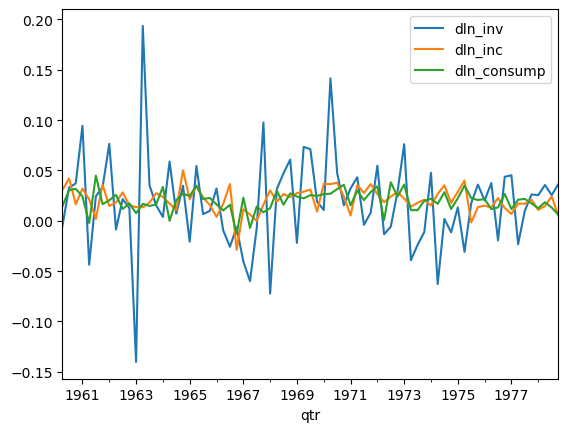

In [30]:
endog.plot()
plt.legend()